<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Atividade_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import torch
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as up


In [65]:
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorna a amostra e o rótulo correspondente
        return self.dados[idx], self.labels[idx]


In [66]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image

# Definir a classe MeuDataset para dados reais
class MeuDataset(Dataset):
    def __init__(self, images_dir, labels, transform=None):
        self.images_dir = images_dir  # Diretório com as imagens
        self.labels = labels           # Dicionário de rótulos
        self.transform = transform     # Transformações para aplicar nas imagens

        # Filtrar apenas arquivos de imagem (ignorando diretórios)
        self.image_files = [
            f for f in sorted(os.listdir(images_dir))
            if os.path.isfile(os.path.join(images_dir, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Carregar a imagem
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert("RGB")  # Converter para RGB se necessário

        # Aplicar transformações
        if self.transform:
            image = self.transform(image)

        # Obter o rótulo da imagem
        label = self.labels.get(img_name, 0)  # Retorna 0 se o rótulo não existir

        return image, label

# Função principal (main)
def main():
    # Definir o caminho para o diretório de imagens e os rótulos
    images_dir = '/content/drive/MyDrive/DataSet3/images'  # Substitua pelo caminho do diretório das suas imagens

    # Dicionário de rótulos, onde a chave é o nome da imagem e o valor é o rótulo
    labels = {
        '/content/drive/MyDrive/DataSet3/images/image.0001.jpg': 0,  # Aqui você só usa o nome do arquivo da imagem
        '/content/drive/MyDrive/DataSet3/images/image.0002.jpg': 1,
        # Adicione mais imagens e seus rótulos conforme necessário
    }


    # Definir as transformações
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    # Criar o dataset com dados reais
    dataset = MeuDataset(images_dir, labels, transform=transform)

    # Criar o DataLoader
    dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

    # Iterar sobre o DataLoader
    for batch_dados, batch_labels in dataloader:
        print(f"Batch de dados: {batch_dados.shape}, Batch de labels: {batch_labels.shape}")
        # Aqui você pode inserir o código de treinamento, validação, etc.
        break  # Apenas para testar uma iteração

# Verifica se o script está sendo executado diretamente
if __name__ == "__main__":
    main()


Batch de dados: torch.Size([8, 3, 256, 256]), Batch de labels: torch.Size([8])


In [67]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from glob import glob
from tqdm import tqdm
from torchvision import transforms

# Definir a classe para carregar o dataset de segmentação
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        # Coleta o nome dos arquivos em images e masks, assumindo que eles têm os mesmos nomes
        self.image_files = sorted(os.listdir(images_dir))  # Lista dos nomes dos arquivos em `images`

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Construindo o caminho completo para a imagem e a máscara
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.image_files[idx])  # Mesmo nome de arquivo nas duas pastas

        # Carregando a imagem e a máscara
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem e a máscara foram carregadas corretamente
        if image is None:
            raise ValueError(f"Erro ao carregar a imagem {image_path}")
        if mask is None:
            raise ValueError(f"Erro ao carregar a máscara {mask_path}")

        # Converter para PIL Image para as transformações
        image = Image.fromarray(image)
        mask = Image.fromarray(mask)

        # Aplicar transformações, se existirem
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Caminhos das pastas para imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet3/images'
masks_dir = '/content/drive/MyDrive/DataSet3/masks'

# Definir transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensiona as imagens
    transforms.ToTensor(),  # Converte a imagem para um tensor
])

# Criar o dataset e o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

# Função principal
def main():
    print(f"Número de pares imagem-máscara no dataset: {len(heart_dataset)}")
    # Iteração de exemplo sobre o DataLoader
    for batch in tqdm(dataloader):
        images = batch['image']
        masks = batch['mask']
        print(f"Batch de imagens: {images.shape}, Batch de máscaras: {masks.shape}")
        break  # Apenas para visualizar a primeira iteração

# Executar a função principal
if __name__ == "__main__":
    main()


Número de pares imagem-máscara no dataset: 9


  0%|          | 0/2 [00:01<?, ?it/s]

Batch de imagens: torch.Size([8, 1, 256, 256]), Batch de máscaras: torch.Size([8, 1, 256, 256])


In [68]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# Definir a classe para carregar o dataset de segmentação
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        # Coleta o nome dos arquivos em images e masks, assumindo que eles têm os mesmos nomes
        self.image_files = sorted(os.listdir(images_dir))  # Lista dos nomes dos arquivos em `images`

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Construindo o caminho completo para a imagem e a máscara
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.image_files[idx])  # Mesmo nome de arquivo nas duas pastas

        # Verificar se o arquivo de imagem existe
        if not os.path.exists(image_path):
            raise ValueError(f"Imagem não encontrada: {image_path}")

        # Verificar se o arquivo de máscara existe
        if not os.path.exists(mask_path):
            raise ValueError(f"Máscara não encontrada: {mask_path}")

        # Carregando a imagem e a máscara
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Verificar se a imagem e a máscara foram carregadas corretamente
        if image is None:
            raise ValueError(f"Erro ao carregar a imagem {image_path}")
        if mask is None:
            raise ValueError(f"Erro ao carregar a máscara {mask_path}")

        # Converter para PIL Image para as transformações
        image = Image.fromarray(image)
        mask = Image.fromarray(mask)

        # Aplicar transformações, se existirem
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Caminhos das pastas para imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet3/images'
masks_dir = '/content/drive/MyDrive/DataSet3/masks'

# Definir transformações com aumento de dados
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensiona as imagens
    transforms.RandomHorizontalFlip(),  # Flip horizontal aleatório
    transforms.RandomVerticalFlip(),  # Flip vertical aleatório
    transforms.RandomRotation(30),  # Rotação aleatória de até 30 graus
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Ajuste de brilho, contraste, etc.
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Translação aleatória
    transforms.ToTensor(),  # Converte a imagem para um tensor
])

# Criar o dataset e o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

# Função principal
def main():
    print(f"Número de pares imagem-máscara no dataset: {len(heart_dataset)}")
    # Iteração de exemplo sobre o DataLoader
    for batch in tqdm(dataloader):
        images = batch['image']
        masks = batch['mask']
        print(f"Batch de imagens: {images.shape}, Batch de máscaras: {masks.shape}")
        break  # Apenas para visualizar a primeira iteração

# Executar a função principal
if __name__ == "__main__":
    main()


Número de pares imagem-máscara no dataset: 9


  0%|          | 0/2 [00:00<?, ?it/s]

Batch de imagens: torch.Size([8, 1, 256, 256]), Batch de máscaras: torch.Size([8, 1, 256, 256])


In [70]:
import os

class MeuDataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, labels, transform=None):
        self.images_dir = images_dir  # Certifique-se de passar o caminho correto para as imagens
        self.labels = labels
        self.transform = transform

        # Verifique se images_dir é um diretório válido
        if not os.path.isdir(self.images_dir):
            raise ValueError(f"O diretório {self.images_dir} não existe ou não é válido!")

        # Filtrar apenas arquivos de imagem (ignorando diretórios)
        self.image_files = [
            f for f in sorted(os.listdir(images_dir))
            if os.path.isfile(os.path.join(images_dir, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.image_files[idx])
        image = Image.open(img_name)  # Supondo que você esteja usando a biblioteca PIL
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [72]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [76]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.images = sorted(os.listdir(images_dir))
        self.masks = sorted(os.listdir(masks_dir))
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])

        image = Image.open(image_path).convert('RGB')  # Abrindo a imagem e convertendo para RGB
        mask = Image.open(mask_path).convert('L')     # Abrindo a máscara (normalmente em escala de cinza)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Definir as transformações
transform = transforms.Compose([
    transforms.ToTensor(),  # Converter para tensor
])

# Criar o DataLoader
dataset = HeartDataset(images_dir='/content/drive/MyDrive/DataSet3/images', masks_dir='/content/drive/MyDrive/DataSet3/masks', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

# Testar o DataLoader
for dados, labels in dataloader:
    print(dados.shape, labels.shape)  # Exemplo: exibir o tamanho dos batches


torch.Size([4, 3, 256, 216]) torch.Size([4, 1, 256, 216])
torch.Size([4, 3, 256, 216]) torch.Size([4, 1, 256, 216])
torch.Size([1, 3, 256, 216]) torch.Size([1, 1, 256, 216])


In [77]:
import torch
from torch.utils.data import DataLoader, Dataset

# Definindo o Dataset personalizado
class MeuDataset(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        return self.dados[idx], self.labels[idx]

# Criando um dataset de exemplo
dados = torch.randn(100, 3)  # 100 amostras, cada uma com 3 características
labels = torch.randint(0, 2, (100,))  # 100 rótulos binários

dataset = MeuDataset(dados, labels)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Iterando sobre o DataLoader
for dados, labels in dataloader:
    print(dados.shape, labels.shape)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ede0e002680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ede0e002680>

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()if w.is_alive():    

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process'if w.is_alive():
AssertionError
  File "/usr/lib/python3.10/multiprocessing/proce

torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])

Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor



torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([16, 3]) torch.Size([16])
torch.Size([4, 3]) torch.Size([4])


In [78]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
class HeartSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(image_dir))  # Listando nomes de arquivos

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega imagem e máscara usando os nomes de arquivos
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.image_names[idx].replace(".png", "_mask.png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplicando transformações
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Tamanho padrão
    transforms.ToTensor()
])

# Criando o dataset
dataset = HeartSegmentationDataset(image_dir="/content/drive/MyDrive/DataSet3/images", mask_dir="/content/drive/MyDrive/DataSet3/masks", transform=transform)

In [80]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Exemplo de definição de um Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.images = os.listdir(images_dir)  # Lista de arquivos de imagem
        self.masks = os.listdir(masks_dir)    # Lista de arquivos de máscara

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Carregando a imagem e a máscara
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])

        image = Image.open(img_path)
        mask = Image.open(mask_path)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Diretórios das imagens e máscaras
images_dir = '/content/drive/MyDrive/DataSet3/images'
masks_dir = '/content/drive/MyDrive/DataSet3/masks'

# Transformações (opcional)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Inicializando o dataset
dataset = CustomDataset(images_dir, masks_dir, transform=transform)

# Criando o DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterando sobre o dataloader
for images, masks in dataloader:
    print(images.shape)  # Exemplo: tamanho do batch de imagens
    print(masks.shape)   # Exemplo: tamanho do batch de máscaras


torch.Size([9, 1, 256, 256])
torch.Size([9, 1, 256, 256])


torch.Size([1, 256, 216])


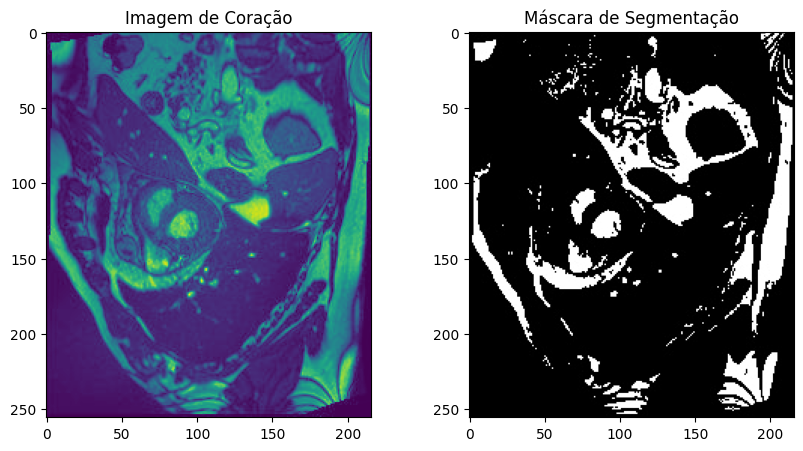

In [82]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

# Carregando a imagem
image_path = '/content/drive/MyDrive/DataSet3/images/image.0001.jpg'
image = Image.open(image_path)

# Convertendo a imagem para tensor
transform = transforms.ToTensor()
image_tensor = transform(image)

# Verificando a forma do tensor
print(image_tensor.shape)  # Deve ser [canais, altura, largura]

# Exibindo a imagem e a máscara
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Garantindo que o tensor está em formato HWC para exibição
ax[0].imshow(image_tensor.permute(1, 2, 0).numpy())  # Convertendo para formato HWC
ax[0].set_title("Imagem de Coração")

# Carregando a máscara (ajuste o caminho conforme necessário)
mask_path = '/content/drive/MyDrive/DataSet/masks/mask_image.0001.jpg'  # Substitua pelo caminho da sua máscara
mask = Image.open(mask_path).convert('L')  # Converte para escala de cinza
mask_tensor = transform(mask)  # Convertendo a máscara para tensor

# Exibindo a máscara em escala de cinza
ax[1].imshow(mask_tensor.squeeze(), cmap="gray")  # Exibindo a máscara
ax[1].set_title("Máscara de Segmentação")

plt.show()


Pastas 'images' e 'masks' verificadas/criadas com sucesso.


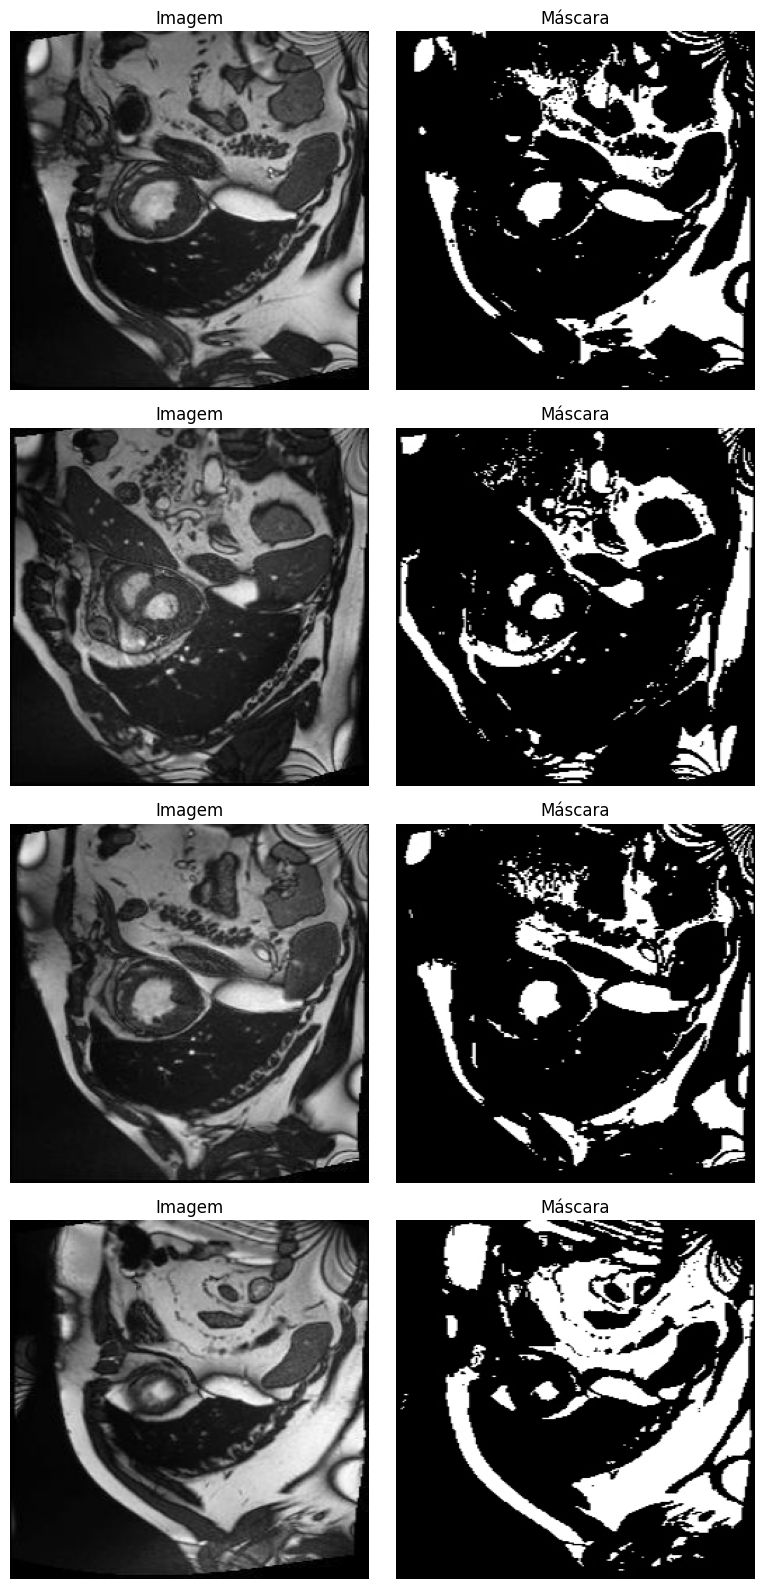

In [83]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminho base do dataset de segmentação do coração
dataset_path = "/content/drive/MyDrive/DataSet3"

# Função para criar as pastas, caso não existam
def criar_pastas_dataset():
    os.makedirs(os.path.join(dataset_path, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "masks"), exist_ok=True)
    print("Pastas 'images' e 'masks' verificadas/criadas com sucesso.")

# Define uma classe personalizada para o dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_names = os.listdir(images_dir)  # lista de imagens

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega a imagem e a máscara usando o índice
        image_path = os.path.join(self.images_dir, self.image_names[idx])
        mask_path = os.path.join(self.masks_dir, self.image_names[idx])

        # Abre as imagens como objetos PIL
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplica as transformações, se houver
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Função para exibir um batch de imagens e máscaras
def visualizar_batch(dataloader):
    images, masks = next(iter(dataloader))  # Obtem um batch
    batch_size = images.size(0)
    fig, axes = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))
    for i in range(batch_size):
        # Converte a imagem e máscara para numpy para exibição
        image_np = images[i].permute(1, 2, 0).numpy()  # rearranja canais para [H, W, C]
        mask_np = masks[i].squeeze().numpy()           # remove dimensões extras

        # Exibe a imagem e a máscara
        axes[i, 0].imshow(image_np)
        axes[i, 0].set_title("Imagem")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_np, cmap="gray")
        axes[i, 1].set_title("Máscara")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Função principal
def main():
    # Chama a função para garantir que as pastas existam
    criar_pastas_dataset()

    # Define o caminho para as pastas de imagens e máscaras
    images_dir = os.path.join(dataset_path, "images")
    masks_dir = os.path.join(dataset_path, "masks")

    # Transforma de exemplo (normalização e redimensionamento)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ])

    # Cria o DataLoader
    heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
    dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True)

    # Chama a função para exibir um batch de imagens e máscaras
    visualizar_batch(dataloader)

# Verifica se o script está sendo executado diretamente
if __name__ == "__main__":
    main()


In [84]:
import os

masks_dir = '/content/drive/MyDrive/DataSet3/images'  # Ajuste conforme necessário
print("Arquivos na pasta de máscaras:", os.listdir(masks_dir))


Arquivos na pasta de máscaras: ['image.0004.jpg', 'image.0002.jpg', 'image.0001.jpg', 'image.0003.jpg', 'image.0009.jpg', 'image.0008.jpg', 'image.0007.jpg', 'image.0006.jpg', 'image.0005.jpg']


In [85]:
import os
import cv2
import glob as gb
from tqdm import tqdm
import numpy as np

# Definições dos parâmetros
TRAIN_PATH = '/content/drive/MyDrive/DataSet3'
TEST_PATH = '/content/drive/MyDrive/DataSet3'
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1

# Inicialização das listas de treino e teste
X_train = []
Y_train = []
X_test = []
Y_test = []

# Função principal
def main():
    # Loop para carregar as imagens e máscaras
    for folder in tqdm(os.listdir(TRAIN_PATH)):
        folder_path = os.path.join(TRAIN_PATH, folder)

        # Caminho para as imagens
        image_files = gb.glob(os.path.join(folder_path, 'image', '*.jpg'))
        for file in image_files:
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            X_train.append(img)  # Adiciona a imagem na lista de treino
            X_test.append(img)   # Adiciona a imagem na lista de teste (caso esteja usando a mesma)

        # Caminho para as máscaras
        mask_files = gb.glob(os.path.join(folder_path, 'mask', '*.jpg'))
        for file in mask_files:
            mask = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Lê a máscara em escala de cinza
            mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))
            Y_train.append(mask)  # Adiciona a máscara na lista de treino
            Y_test.append(mask)   # Adiciona a máscara na lista de teste (caso esteja usando a mesma)

    # Converte as listas para arrays NumPy e ajusta as dimensões
    X_train_np = np.array(X_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajusta as dimensões
    Y_train_np = np.array(Y_train).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)  # Ajusta as dimensões
    X_test_np = np.array(X_test).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)    # Ajusta as dimensões
    Y_test_np = np.array(Y_test).reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)    # Ajusta as dimensões

    # Verifica as dimensões finais
    print("Dimensões de X_train:", X_train_np.shape)
    print("Dimensões de Y_train:", Y_train_np.shape)
    print("Dimensões de X_test:", X_test_np.shape)
    print("Dimensões de Y_test:", Y_test_np.shape)

# Verifica se o script está sendo executado diretamente
if __name__ == "__main__":
    main()


100%|██████████| 2/2 [00:00<00:00, 720.92it/s]

Dimensões de X_train: (0, 256, 256, 1)
Dimensões de Y_train: (0, 256, 256, 1)
Dimensões de X_test: (0, 256, 256, 1)
Dimensões de Y_test: (0, 256, 256, 1)


In [86]:
images.shape

torch.Size([9, 1, 256, 256])

In [90]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Caminhos para as pastas com as imagens e máscaras
images_path = '/content/drive/MyDrive/DataSet3/images'
masks_path = '/content/drive/MyDrive/DataSet3/masks'

# Carregar as imagens e máscaras
image_files = sorted(os.listdir(images_path))
mask_files = sorted(os.listdir(masks_path))

# Carregar as imagens em formato RGB e as máscaras em binário
X = []
Y = []

for image_file, mask_file in zip(image_files, mask_files):
    # Carregar imagem (supondo que sejam JPG ou PNG)
    image = cv2.imread(os.path.join(images_path, image_file))
    mask = cv2.imread(os.path.join(masks_path, mask_file), cv2.IMREAD_GRAYSCALE)  # Máscara em escala de cinza

    # Verificar se a imagem e máscara foram carregadas corretamente
    if image is None or mask is None:
        print(f"Erro ao carregar a imagem ou máscara: {image_file}, {mask_file}")
        continue

    # Redimensionar para um tamanho fixo (exemplo: 256x256)
    image = cv2.resize(image, (256, 256))
    mask = cv2.resize(mask, (256, 256))

    # Garantir que a máscara seja binária (0 ou 1)
    mask = np.where(mask > 127, 1, 0)  # Ou seja, valores maiores que 127 são 1, o resto é 0

    # Empilhar a imagem para garantir 3 canais (RGB), caso esteja em escala de cinza
    if image.ndim == 2:  # Imagem em escala de cinza
        image = np.stack((image,) * 3, axis=-1)  # Empilhamento para RGB

    # Adicionar imagem e máscara à lista
    X.append(image)
    Y.append(mask)

# Converter listas para arrays NumPy
X = np.array(X)
Y = np.array(Y)

# Dividir os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verificar as dimensões
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de Y_train:", Y_train.shape)
print("Dimensões de Y_test:", Y_test.shape)

# Converter Y_train e Y_test para tipo adequado
Y_train = Y_train.astype(np.uint8)  # Binário
Y_test = Y_test.astype(np.uint8)

# Verificar novamente as dimensões após o tipo correto
print("Dimensões de Y_train após conversão:", Y_train.shape)
print("Dimensões de Y_test após conversão:", Y_test.shape)


Dimensões de X_train: (7, 256, 256, 3)
Dimensões de X_test: (2, 256, 256, 3)
Dimensões de Y_train: (7, 256, 256)
Dimensões de Y_test: (2, 256, 256)
Dimensões de Y_train após conversão: (7, 256, 256)
Dimensões de Y_test após conversão: (2, 256, 256)


In [91]:
X_train=X_train.astype(np.float32)
Y_train=Y_train.astype(np.float32)
X_test=X_test.astype(np.float32)
Y_test=Y_test.astype(np.float32)

In [92]:
print('Tamanho do Treino: ', X_train.shape)
print('Tamanho do Teste: ', X_test.shape)

Tamanho do Treino:  (7, 256, 256, 3)
Tamanho do Teste:  (2, 256, 256, 3)


In [93]:
print('Tamanho do Treino: ', X_test.shape)
print('Tamanho do Teste: ', Y_test.shape)

Tamanho do Treino:  (2, 256, 256, 3)
Tamanho do Teste:  (2, 256, 256)


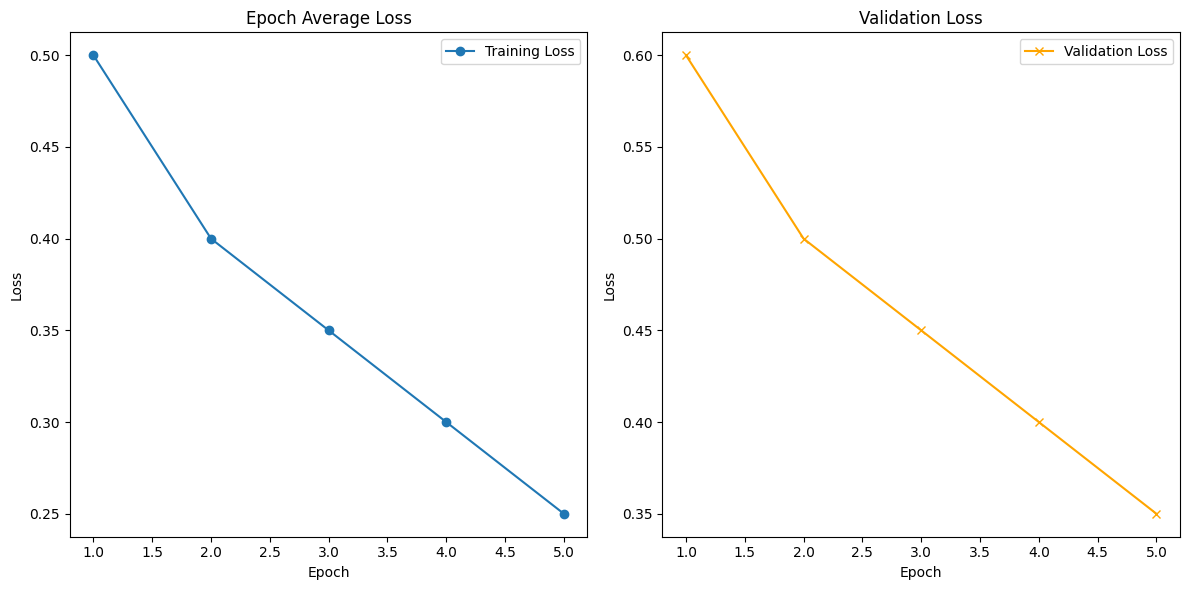

In [94]:
import matplotlib.pyplot as plt

# Exemplo de inicialização de variáveis
epoch_loss_values = [0.5, 0.4, 0.35, 0.3, 0.25]  # Exemplo de perdas de treinamento por época
losses_validation = [0.6, 0.5, 0.45, 0.4, 0.35]  # Exemplo de perdas de validação
val_interval = 1  # Intervalo de validação (pode ser ajustado conforme necessário)

# Criar a figura para plotar
plt.figure("train", (12, 6))

# Subplot para perda média por época
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x_train = [i + 1 for i in range(len(epoch_loss_values))]
y_train = epoch_loss_values
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_train, y_train, marker='o', label='Training Loss')
plt.legend()

# Subplot para perda de validação
plt.subplot(1, 2, 2)
plt.title("Validation Loss")
x_val = [val_interval * (i + 1) for i in range(len(losses_validation))]
y_val = losses_validation
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(x_val, y_val, marker='x', color='orange', label='Validation Loss')
plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Melhora o layout
plt.show()


In [102]:
import torch.nn as nn
import torch.optim as optim

# Exemplo de definição de um modelo de rede neural convolucional simples
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 256)  # Ajuste o tamanho conforme necessário
        self.fc2 = nn.Linear(256, 1)  # Saída para segmentação binária

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.ReLU()(self.conv2(x))
        x = x.view(x.size(0), -1)  # Achata a saída
        x = nn.Sigmoid()(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicialização do modelo
model = SimpleCNN()

# Definição da função de perda e do otimizador
criterion = nn.BCELoss()  # Se estiver usando saída binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [107]:
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/DataSet3"
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*/*.nii")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train and 4 validation


In [108]:
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt

# Defina o diretório onde os dados estão armazenados
data_dir = "/content/drive/MyDrive/DataSet3"

# Verifique se o diretório existe
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"O diretório {data_dir} não existe. Verifique o caminho.")

# Carregar e ordenar as imagens e máscaras no formato NIfTI
train_images = sorted(glob.glob(os.path.join(data_dir, "images", "*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "masks", "*.nii")))

# Verifique se foram encontrados arquivos de imagem e máscara
if len(train_images) == 0:
    print(f"Nenhum arquivo de imagem '.nii' encontrado no diretório {os.path.join(data_dir, 'images')}")
if len(train_labels) == 0:
    print(f"Nenhum arquivo de máscara '.nii' encontrado no diretório {os.path.join(data_dir, 'masks')}")

# Certifique-se de que o número de imagens corresponde ao número de máscaras
assert len(train_images) == len(train_labels), (
    f"Número de imagens ({len(train_images)}) não corresponde ao número de máscaras ({len(train_labels)})"
)

# Crie uma lista de dicionários associando cada imagem à sua máscara
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divida os dados em conjuntos de treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # Aqui consideramos os últimos 4 para validação

# Exibir o número de arquivos de treinamento e validação
print("Número de arquivos de treinamento:", len(train_files))
print("Número de arquivos de validação:", len(val_files))

# Exibir alguns exemplos para verificação
print("\nExemplos de arquivos de treinamento:")
for item in train_files[:3]:  # Mostrar os primeiros 3 exemplos
    print(item)

print("\nExemplos de arquivos de validação:")
for item in val_files[:3]:  # Mostrar os primeiros 3 exemplos de validação (se houver)
    print(item)


Nenhum arquivo de imagem '.nii' encontrado no diretório /content/drive/MyDrive/DataSet3/images
Nenhum arquivo de máscara '.nii' encontrado no diretório /content/drive/MyDrive/DataSet3/masks
Número de arquivos de treinamento: 0
Número de arquivos de validação: 0

Exemplos de arquivos de treinamento:

Exemplos de arquivos de validação:


In [110]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# 1. Definir a classe de dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask

        # Filtrar apenas arquivos de imagem, ignorando arquivos ocultos
        self.image_files = sorted([f for f in os.listdir(images_dir) if not f.startswith('.')])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if not f.startswith('.')])

        # Verificar se o número de imagens e máscaras é o mesmo
        assert len(self.image_files) == len(self.mask_files), "Número de imagens e máscaras deve ser o mesmo!"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara é carregada como escala de cinza (grayscale)

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# 2. Definir transformações
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Converte para tensor, mantendo escala de cinza
])

# 3. Criar o dataset
images_dir = '/content/drive/MyDrive/DataSet3/images'
masks_dir = '/content/drive/MyDrive/DataSet3/masks'
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform_image=transform_image, transform_mask=transform_mask)

# 4. Criar o DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# 5. Iterar sobre o DataLoader
for images, masks in dataloader:
    print(f"Imagens batch size: {images.size()}")
    print(f"Máscaras batch size: {masks.size()}")
    # Loop de treinamento ou validação
    pass


Imagens batch size: torch.Size([8, 3, 256, 256])
Máscaras batch size: torch.Size([8, 1, 256, 256])
Imagens batch size: torch.Size([1, 3, 256, 256])
Máscaras batch size: torch.Size([1, 1, 256, 256])


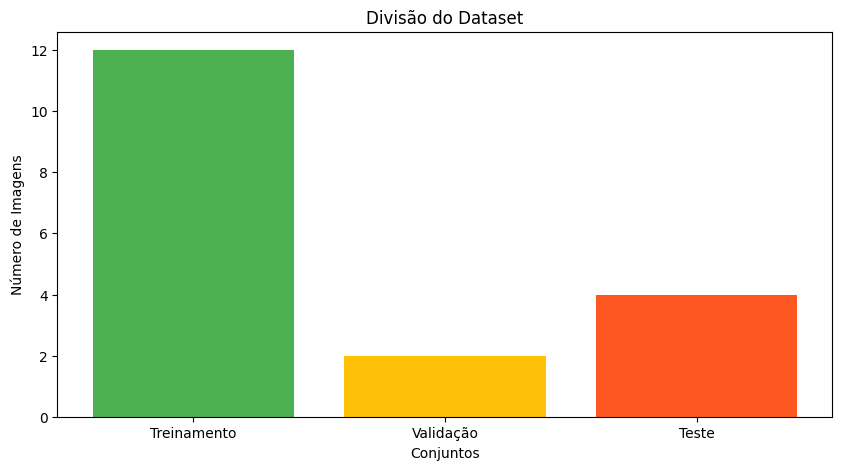

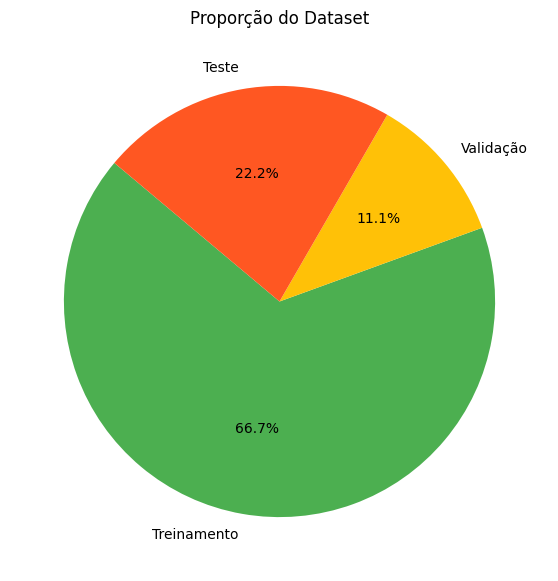

In [111]:
import matplotlib.pyplot as plt

# Definir tamanhos dos conjuntos
total_images = 18  # Exemplo: dataset com 18 imagens
train_size = int(0.7 * total_images)  # 70% para treinamento
val_size = int(0.15 * total_images)   # 15% para validação
test_size = total_images - train_size - val_size  # 15% para teste

# Dados para os gráficos
sizes = [train_size, val_size, test_size]
labels = ['Treinamento', 'Validação', 'Teste']
colors = ['#4CAF50', '#FFC107', '#FF5722']

# Gráfico de Barras
plt.figure(figsize=(10, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Divisão do Dataset')
plt.xlabel('Conjuntos')
plt.ylabel('Número de Imagens')
plt.show()

# Gráfico de Pizza
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporção do Dataset')
plt.show()


Exibindo exemplos de cada conjunto:


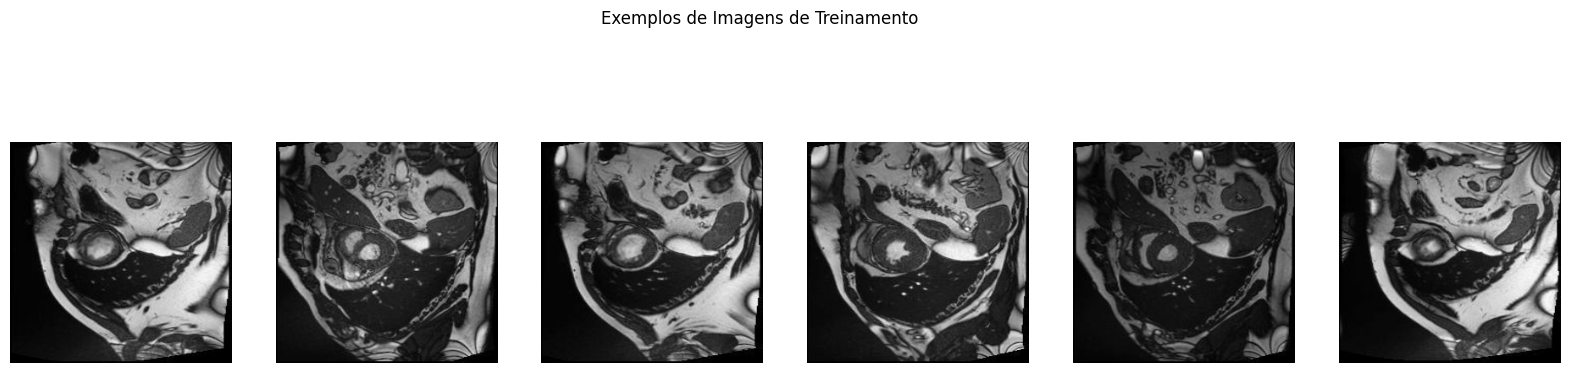

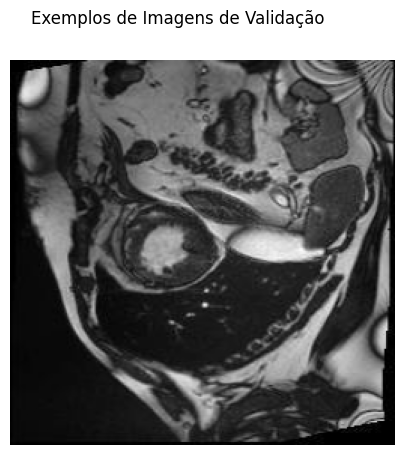

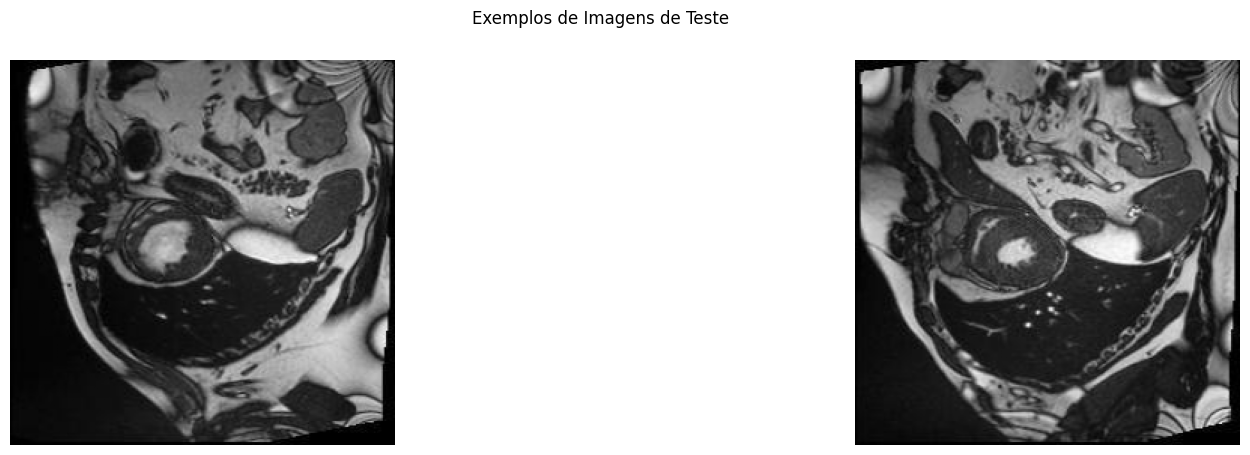

In [112]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# 1. Criar a classe de dataset personalizada
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        # Filtrar apenas arquivos para evitar subdiretórios
        self.image_files = sorted([f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if os.path.isfile(os.path.join(masks_dir, f))])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask

# 2. Configurar diretórios e transformações
images_dir = '/content/drive/MyDrive/DataSet3/images'
masks_dir = '/content/drive/MyDrive/DataSet3/masks'

# Transformação para imagens e máscaras
transform_image = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# 3. Criar o dataset e dividir em treino, validação e teste
dataset = HeartSegmentationDataset(images_dir, masks_dir, transform_image=transform_image, transform_mask=transform_mask)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 4. Criar DataLoaders para cada conjunto
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

# 5. Exibir alguns exemplos de dados
def show_samples(dataloader, title):
    images, masks = next(iter(dataloader))
    num_images = images.size(0)  # Número real de imagens no lote

    # Cria uma figura com o número correto de subplots
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle(title)

    # Se num_images é 1, 'axes' não será uma lista, então ajustamos para ser iterável
    if num_images == 1:
        axes = [axes]

    for i in range(num_images):
        img = images[i].permute(1, 2, 0)  # Rearrange para exibição no matplotlib
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# Exibir exemplos dos conjuntos
print("Exibindo exemplos de cada conjunto:")
show_samples(train_loader, "Exemplos de Imagens de Treinamento")
show_samples(val_loader, "Exemplos de Imagens de Validação")
show_samples(test_loader, "Exemplos de Imagens de Teste")


In [114]:
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform_image=None, transform_mask=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform_image = transform_image
        self.transform_mask = transform_mask
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        self.mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])

        # Verificar se o número de imagens e máscaras corresponde
        if len(self.image_files) != len(self.mask_files):
            raise ValueError(f"Número de imagens ({len(self.image_files)}) e máscaras ({len(self.mask_files)}) não correspondem.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        # Verifica se o caminho da máscara é um arquivo
        if not os.path.isfile(mask_path):
            raise FileNotFoundError(f"Máscara não encontrada: {mask_path}")

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform_image:
            image = self.transform_image(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)

        return image, mask





In [115]:
# importar as bibliotecas necessárias
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# definir a classe Dataset
class data_set(Dataset):
    def __init__(self):
        numbers = list(range(0, 100, 1))
        self.data = numbers

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]


dataset = data_set()

# implementação do dataloader no conjunto de dados e impressão por lote

dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
for i, batch in enumerate(dataloader):
    print(i, batch)

0 tensor([85, 32, 42,  1, 26, 44, 20, 10, 96, 86])
1 tensor([13, 88, 76,  7, 87, 91, 72,  5, 62,  4])
2 tensor([97, 65, 47, 70, 50, 98, 15, 52, 39, 79])
3 tensor([29, 34,  9, 25, 16, 40, 94, 12, 53, 77])
4 tensor([82, 17, 80, 24, 49, 45,  3, 75, 48,  6])
5 tensor([18, 66, 46, 41, 19, 92, 69, 67, 81, 36])
6 tensor([95, 60, 51, 64, 23, 37, 73, 54, 14, 74])
7 tensor([35, 93, 55, 99, 30, 31, 89, 71, 83,  8])
8 tensor([ 2, 61, 56, 28, 21, 38, 84, 68,  0, 63])
9 tensor([58, 57, 22, 27, 59, 90, 78, 11, 43, 33])


In [116]:

# importar as bibliotecas necessárias
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import seaborn as sns
from torch.utils.data import TensorDataset

# Definição do conjunto de dados constituído por
# duas colunas do conjunto de dados da íris
iris = sns.load_dataset('iris')
petal_length = torch.tensor(iris['petal_length'])
petal_width = torch.tensor(iris['petal_width'])
dataset = TensorDataset(petal_length, petal_width)

# implementando o dataloader no conjunto de dados
# e impressão por lote
dataloader = DataLoader(dataset,
                        batch_size=5,
                        shuffle=True)

for i in dataloader:
    print(i)

[tensor([1.5000, 1.4000, 6.0000, 6.3000, 3.5000], dtype=torch.float64), tensor([0.2000, 0.2000, 1.8000, 1.8000, 1.0000], dtype=torch.float64)]
[tensor([4.7000, 4.5000, 5.0000, 4.9000, 1.5000], dtype=torch.float64), tensor([1.5000, 1.5000, 1.7000, 1.8000, 0.4000], dtype=torch.float64)]
[tensor([3.9000, 1.6000, 1.7000, 1.5000, 1.7000], dtype=torch.float64), tensor([1.2000, 0.4000, 0.2000, 0.3000, 0.3000], dtype=torch.float64)]
[tensor([1.4000, 1.4000, 4.0000, 1.6000, 1.4000], dtype=torch.float64), tensor([0.1000, 0.2000, 1.3000, 0.6000, 0.2000], dtype=torch.float64)]
[tensor([1.9000, 5.6000, 1.4000, 1.6000, 5.7000], dtype=torch.float64), tensor([0.2000, 1.4000, 0.1000, 0.2000, 2.3000], dtype=torch.float64)]
[tensor([3.6000, 4.4000, 5.5000, 4.6000, 5.0000], dtype=torch.float64), tensor([1.3000, 1.2000, 2.1000, 1.5000, 2.0000], dtype=torch.float64)]
[tensor([5.2000, 4.1000, 4.4000, 5.1000, 1.4000], dtype=torch.float64), tensor([2.3000, 1.3000, 1.4000, 2.4000, 0.2000], dtype=torch.float64)]

In [117]:
import os
import glob

data_dir = "/content/drive/MyDrive/DataSet3"

# Acesse as imagens e os rótulos
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*/*.nii")))

# Corrigido: use 'for' ao invés de 'para' e 'in' ao invés de 'em' (em português)
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

# Divide os arquivos em treinamento e validação
train_files, val_files = data_dicts[:-4], data_dicts[-4:]  # 16 train e 4 arquivos de validação

train_files  # Para exibir os arquivos de treino




[]

In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F



# Definição da CNN
class HeartSegmentationCNN(nn.Module):
    def __init__(self):
        super(HeartSegmentationCNN, self).__init__()

        # Camada convolucional 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Camadas de pooling
        self.pool = nn.MaxPool2d(2, 2)

        # Camada totalmente conectada (para segmentação)
        self.conv_out = nn.Conv2d(64, 1, kernel_size=1)  # A última camada deve ter 1 saída (máscara binária)

    def forward(self, x):
        # Passando pelas camadas convolucionais + ReLU + Pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Segmentação final com a camada convolucional de saída
        x = torch.sigmoid(self.conv_out(x))  # Aplique Sigmoid para obter valores de probabilidade entre 0 e 1

        return x


In [119]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Input

# Criar o modelo Sequential com forma de entrada definida
model = Sequential([
    Input(shape=(256, 256, 3)),  # Defina a forma de entrada, ajuste conforme necessário
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Agora, o modelo está construído e pronto para compilar
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Exibir o resumo do modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,066,698 (252.02 MB)

 Trainable params: 66,066,698 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
import keras
model.compile(
    loss=keras.losses.categorical_crossentropy,  # Função de perda para classificação categórica
    optimizer=keras.optimizers.SGD(0.000001),    # Otimizador SGD com uma taxa de aprendizado muito baixa
    metrics=['accuracy']                         # Métrica de acurácia
)


In [121]:
# Instanciar o modelo
model = HeartSegmentationCNN()

# Definir o otimizador e a função de perda
criterion = nn.BCELoss()  # Função de perda para segmentação binária
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [122]:
# Definir dispositivo (GPU se disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Função de treinamento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()  # Colocar o modelo em modo de treinamento

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, masks in train_loader:
            images, masks = images.to(device), masks.to(device)

            # Limpar gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            outputs = outputs.squeeze(1)  # Remover dimensão extra da saída
            loss = criterion(outputs, masks)

            # Backward pass e otimização
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Exibir estatísticas por época
        print(f"Época {epoch+1}/{num_epochs}, Perda: {running_loss/len(train_loader)}")

        # Validação ao final de cada época (opcional)
        validate_model(model, val_loader, criterion)

    print("Treinamento finalizado!")

# Função de validação (opcional, para acompanhar desempenho em validação)
def validate_model(model, val_loader, criterion):
    model.eval()  # Colocar o modelo em modo de avaliação
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    print(f"Perda na validação: {val_loss / len(val_loader)}")
    model.train()  # Voltar ao modo de treinamento após validação


In [123]:
EPOCHS = 5
BATCH_SIZE = 8

In [124]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # Upsample para retornar ao tamanho original [256, 256]
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [125]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# Exemplo de Dataset, substitua pelo seu próprio dataset
class SeuDatasetDeTreinamento(Dataset):
    def __init__(self, dados, labels):
        self.dados = dados
        self.labels = labels

    def __len__(self):
        return len(self.dados)

    def __getitem__(self, idx):
        # Retorne a amostra de dados e o rótulo (label)
        return self.dados[idx], self.labels[idx]

# Criar dados fictícios para exemplificação
dados_treino = torch.randn(100, 10)  # 100 amostras, 10 características
labels_treino = torch.randint(0, 2, (100,))  # Rótulos binários (0 ou 1)

dados_val = torch.randn(20, 10)  # 20 amostras de validação
labels_val = torch.randint(0, 2, (20,))

# Criar datasets de treino e validação
train_dataset = SeuDatasetDeTreinamento(dados_treino, labels_treino)
val_dataset = SeuDatasetDeTreinamento(dados_val, labels_val)

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Definir o modelo, critério e otimizador
model = nn.Sequential(
    nn.Linear(10, 50),  # Ajustar o número de entradas conforme seus dados
    nn.ReLU(),
    nn.Linear(50, 2)    # 2 classes de saída (binário)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir a função de treinamento
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Modo de treino
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validação
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}")

# Treinar o modelo por 10 épocas
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Epoch [1/10], Loss: 2.8308, Val Loss: 0.6741
Epoch [2/10], Loss: 2.8296, Val Loss: 0.6833
Epoch [3/10], Loss: 2.7384, Val Loss: 0.6896
Epoch [4/10], Loss: 2.7765, Val Loss: 0.6915
Epoch [5/10], Loss: 2.8335, Val Loss: 0.6916
Epoch [6/10], Loss: 2.8261, Val Loss: 0.6956
Epoch [7/10], Loss: 2.7411, Val Loss: 0.6995
Epoch [8/10], Loss: 2.7522, Val Loss: 0.7012
Epoch [9/10], Loss: 2.7591, Val Loss: 0.7046
Epoch [10/10], Loss: 2.7082, Val Loss: 0.7078


In [126]:
import os
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

class ADE20KDataset(Dataset):
    def __init__(self, images_dir, annotations_dir, transforms=None):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.transforms = transforms
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(annotations_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_filename = self.image_files[idx]

        img_name = os.path.join(self.images_dir, image_filename)
        image = Image.open(img_name).convert("RGB")

        # Generate the mask filename based on the image filename
        mask_filename = image_filename.replace(".jpg", ".png")
        mask_name = os.path.join(self.annotations_dir, mask_filename)

        mask = Image.open(mask_name)

        if self.transforms:
            image = self.transforms(image)
            mask = self.transforms(mask)

        return image, mask


In [127]:
images.shape

torch.Size([1, 3, 256, 256])

In [129]:
label.shape

torch.Size([])

In [133]:
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt


data_dir = "/content/drive/MyDrive/DataSet3"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*/*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*/*.nii")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:] # 16 train and 4 validation

print(f"Número de imagens de treino: {len(train_files)}")
print(f"Número de imagens de validação: {len(val_files)}")

Número de imagens de treino: 0
Número de imagens de validação: 0


In [134]:
import os
import cv2
import glob
import numpy as np
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

class HeartDataset(Dataset):
    def __init__(self, data_dir, img_size=(256, 256)):
        self.img_size = img_size
        self.image_paths = glob.glob(os.path.join(data_dir, 'images', '*.jpg'))  # Ajuste a extensão se necessário
        self.mask_paths = glob.glob(os.path.join(data_dir, 'masks', '*.jpg'))    # Ajuste a extensão se necessário

        # Verifica se as quantidades de imagens e máscaras correspondem
        assert len(self.image_paths) == len(self.mask_paths), "O número de imagens e máscaras não corresponde."

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        # Carrega a imagem e a máscara
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Redimensiona as imagens e máscaras
        image = cv2.resize(image, self.img_size)
        mask = cv2.resize(mask, self.img_size)

        # Normaliza as imagens (opcional)
        image = image / 255.0
        mask = mask / 255.0  # Se as máscaras forem binárias, você pode optar por normalizar

        return {
            'image': image,
            'label': mask
        }

# Diretório do dataset
data_dir = '/content/drive/MyDrive/DataSet3'

# Criação do Dataset e DataLoader
heart_dataset = HeartDataset(data_dir)
dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True)

# Testar o DataLoader
for batch in dataloader:
    images = batch['image']
    labels = batch['label']
    print(f"Número de imagens no batch: {images.shape[0]}")
    print(f"Dimensões das imagens: {images.shape}")
    print(f"Dimensões das máscaras: {labels.shape}")
    break  # Remova esta linha para iterar sobre todos os batches


Número de imagens no batch: 8
Dimensões das imagens: torch.Size([8, 256, 256])
Dimensões das máscaras: torch.Size([8, 256, 256])


In [135]:
images.shape

torch.Size([8, 256, 256])

In [136]:
labels.shape

torch.Size([8, 256, 256])

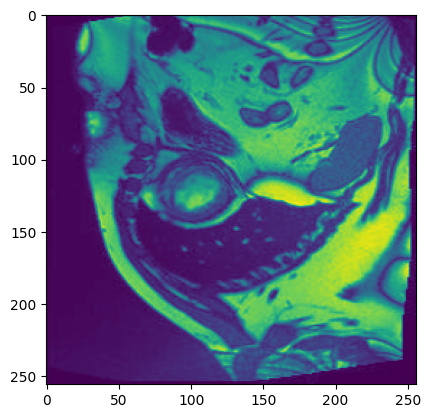

In [141]:
plt.imshow(images[7,:, :])

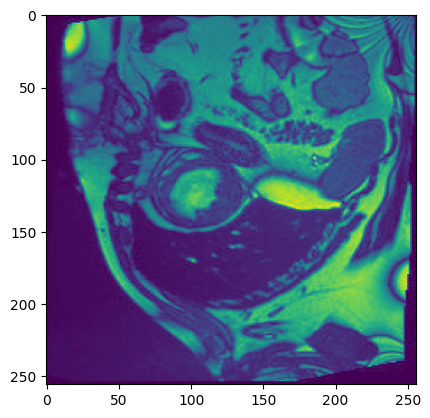

In [142]:
plt.imshow(images[2,:, :])

In [144]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from tqdm import tqdm

# Classe para carregar o dataset de imagens e máscaras
class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_files = sorted(glob(os.path.join(images_dir, "*.jpg")))  # Ajuste a extensão se necessário
        self.mask_files = sorted(glob(os.path.join(masks_dir, "*.jpg")))    # Ajuste a extensão se necessário

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Função principal
def main():
    # Definir os diretórios das imagens e máscaras
    images_dir = '/content/drive/MyDrive/DataSet3/images'
    masks_dir = '/content/drive/MyDrive/DataSet3/masks'

    # Definir transformações
    train_transforms = transforms.Compose([
        transforms.ToTensor(),            # Converte a imagem para um tensor
        transforms.Resize((256, 256)),    # Redimensiona as imagens
    ])

    # Criar dataset e dataloader
    heart_dataset = HeartDataset(images_dir, masks_dir, transform=train_transforms)
    dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

    # Verificar o número de imagens e máscaras
    print(f"Número de imagens: {len(heart_dataset)}")

    # Exemplo de iteração sobre o DataLoader
    for batch in tqdm(dataloader):
        images = batch['image']
        masks = batch['mask']
        print(f"Batch de imagens: {images.shape}, Batch de máscaras: {masks.shape}")
        break  # Apenas para evitar um loop infinito durante a visualização

# Verifica se o script está sendo executado diretamente
if __name__ == "__main__":
    main()


Número de imagens: 9


  0%|          | 0/2 [00:00<?, ?it/s]

Batch de imagens: torch.Size([8, 1, 256, 256]), Batch de máscaras: torch.Size([8, 1, 256, 256])


In [145]:
import torch.nn as nn

class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        # Defina suas camadas aqui
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Exemplo de camada convolucional
        self.conv2 = nn.Conv2d(16, 1, kernel_size=3, padding=1)  # Camada de saída

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        return x

# Crie uma instância do modelo
model = SimpleUNet()  # Use o nome da classe do seu modelo real aqui


In [146]:
# Definir seu modelo aqui
class SimpleUNet(nn.Module):  # Exemplo de uma definição de modelo
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        return x

# Criar a instância do modelo
model = SimpleUNet()  # Substitua por seu modelo real
model.to(device)  # Mova o modelo para o dispositivo

# Restante do código para calcular as métricas...


SimpleUNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [147]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from tqdm import tqdm
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Definir a classe do Dataset
class HeartDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform

        # Carregar todos os arquivos de imagem e máscara
        self.image_files = sorted(glob(os.path.join(images_dir, "*.jpg")))  # Ajuste a extensão conforme necessário
        self.mask_files = sorted(glob(os.path.join(masks_dir, "*.jpg")))    # Ajuste a extensão conforme necessário

        # Verificar se o número de imagens e máscaras é consistente
        assert len(self.image_files) == len(self.mask_files), "Número de imagens e máscaras não correspondem"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Carregar a imagem e a máscara
        image = cv2.imread(self.image_files[idx], cv2.IMREAD_GRAYSCALE)  # Lê a imagem em escala de cinza
        mask = cv2.imread(self.mask_files[idx], cv2.IMREAD_GRAYSCALE)    # Lê a máscara em escala de cinza

        # Binarizar a máscara
        _, mask = cv2.threshold(mask, 127, 1, cv2.THRESH_BINARY)  # Ajuste o threshold conforme necessário

        # Adicionar a dimensão de canal (C = 1 para imagens em escala de cinza)
        image = np.expand_dims(image, axis=-1)  # Transformar para (H, W, 1)
        mask = np.expand_dims(mask, axis=-1)    # Transformar para (H, W, 1)

        # Verificar se existe transformação
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return {"image": image, "mask": mask}

# Definir a classe do modelo (substituir pela arquitetura real)
class YourModel(torch.nn.Module):
    def __init__(self):
        super(YourModel, self).__init__()
        # Defina sua arquitetura aqui

    def forward(self, x):
        # Defina a passagem para frente aqui
        return x  # Placeholder, substitua pela saída do seu modelo

# Função para calcular as métricas
def calculate_metrics(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Cálculo do Dice Coefficient
    intersection = np.sum(y_true * y_pred)
    dice = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred) + 1e-8)

    # Cálculo do IoU
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-8)

    return accuracy, precision, recall, f1, dice, iou

# Função principal (main)
def main():
    # Definir os diretórios das imagens e máscaras
    images_dir = '/content/drive/MyDrive/DataSet3/images'
    masks_dir = '/content/drive/MyDrive/DataSet3/masks'

    # Definir transformações
    train_transforms = transforms.Compose([
        transforms.ToPILImage(),  # Converte a imagem de NumPy para PIL
        transforms.Resize((256, 256)),  # Redimensiona as imagens
        transforms.ToTensor(),  # Converte a imagem para tensor
    ])

    # Criar dataset e dataloader
    heart_dataset = HeartDataset(images_dir, masks_dir, transform=train_transforms)
    dataloader = DataLoader(heart_dataset, batch_size=8, shuffle=True, num_workers=4)

    # Definir dispositivo
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Inicializar o modelo
    model = YourModel()
    model.to(device)

    # Inicialização de métricas
    all_metrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": [],
        "dice": [],
        "iou": []
    }

    # Verificar o número de imagens e máscaras
    print(f"Número de imagens: {len(heart_dataset)}")

    # Iterar sobre o DataLoader para calcular métricas
    for batch in tqdm(dataloader):
        images = batch['image'].to(device)
        masks = batch['mask'].to(device)

        model.eval()
        with torch.no_grad():
            outputs = model(images)

            # Convertendo as saídas para binárias, caso seja segmentação binária
            predictions = torch.sigmoid(outputs) > 0.5
            true_labels = masks > 0.5

            # Calcular métricas
            accuracy, precision, recall, f1, dice, iou = calculate_metrics(true_labels.cpu().numpy(), predictions.cpu().numpy())

            # Armazenar as métricas
            all_metrics["accuracy"].append(accuracy)
            all_metrics["precision"].append(precision)
            all_metrics["recall"].append(recall)
            all_metrics["f1"].append(f1)
            all_metrics["dice"].append(dice)
            all_metrics["iou"].append(iou)

    # Calcular a média das métricas
    avg_metrics = {metric: np.mean(values) for metric, values in all_metrics.items()}

    # Exibir as métricas médias
    print("Métricas de Desempenho:")
    for metric, value in avg_metrics.items():
        print(f"{metric}: {value:.4f}")

# Executar a função main
if __name__ == "__main__":
    main()


Número de imagens: 9


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 50%|█████     | 1/2 [00:01<00:01,  1.40s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

Métricas de Desempenho:
accuracy: 0.0235
precision: 0.0000
recall: 0.0000
f1: 0.0000
dice: 0.0000
iou: 0.0000
